In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [ ]:
# Odczytywanie danych
data = pd.read_csv("housing.csv", header=None,delim_whitespace=True)

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
# Normalizacja danych
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Podział danych na zbiory uczące i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Tworzenie sieci neuronowej
from keras.layers import Dropout

model = Sequential()
model.add(Dense(20, input_dim=13, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

In [ ]:
# Kompilacja modeli
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Uczenie modelu
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
41/41 [==============================] - 1s 1ms/step - loss: 611.7020
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 592.1569
Epoch 3/100
41/41 [==============================] - 0s 1ms/step - loss: 561.3683
Epoch 4/100
41/41 [==============================] - 0s 1ms/step - loss: 529.3273
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 473.8378
Epoch 6/100
41/41 [==============================] - 0s 2ms/step - loss: 421.8942
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 340.2924
Epoch 8/100
41/41 [==============================] - 0s 1ms/step - loss: 278.3846
Epoch 9/100
41/41 [==============================] - 0s 2ms/step - loss: 224.8855
Epoch 10/100
41/41 [==============================] - 0s 1ms/step - loss: 250.1922
Epoch 11/100
41/41 [==============================] - 0s 1ms/step - loss: 207.4011
Epoch 12/100
41/41 [==============================] - 0s 1ms/step - loss: 183.7260
Epoch 13/100


In [ ]:
# Przewidywanie na danych testowych
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [ ]:
# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 31.79246265804516


Jeśli ceny nieruchomości różnią się znacznie (na przykład od 100 do 1000), akceptowalnym błędem może być MSE 31,79.

Jeśli realne wartości cen nieruchomości wahają się w wąskim przedziale (na przykład od 10 do 50), to MSE 31,79 będzie bardzo dużym błędem.


<ipython-input-12-b74ad013340c>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='red')


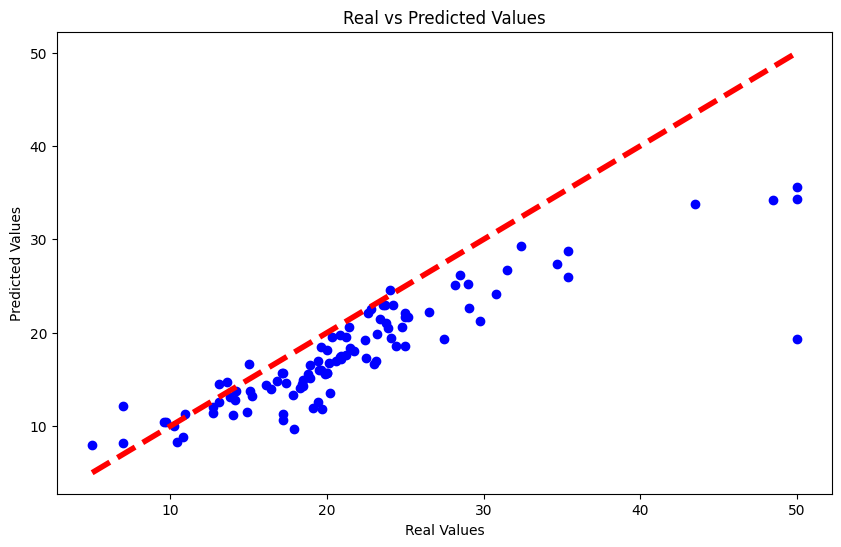

In [ ]:
import matplotlib.pyplot as plt

 # Wizualizacja rzeczywistych i przewidywanych wartości

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='red')
plt.title('Real vs Predicted Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()